In [96]:
%matplotlib inline

import numpy as np
import random
import requests as rq
import sys
import io
import re
import pandas as pd
import matplotlib.pyplot as plt
from gensim import models
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /Users/abby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/abby/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/abby/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
model_fox = Word2Vec.load("./models/fox.model")
model_reuters = Word2Vec.load("./models/reuters.model")
model_the_hill = Word2Vec.load("./models/the_hill.model")
model_cnn = Word2Vec.load("./models/cnn.model")
model_nyt = Word2Vec.load("./models/nyt.model")

In [5]:
adjectives = ['disorganized', 'devious', 'impressionable', 'circumspect', 'impassive', 
             'aimless', 'effeminate', 'unfathomable', 'fickle', 'unprincipled', 'inoffensive', 
             'reactive', 'providential', 'resentful', 'bizarre', 'impractical',
             'sarcastic', 'misguided', 'imitative', 'pedantic', 'venomous', 'erratic', 'insecure', 
             'resourceful', 'neurotic', 'forgiving', 'profligate', 'whimsical', 'assertive', 
             'incorruptible', 'individualistic', 'faithless', 'disconcerting', 'barbaric', 
             'hypnotic', 'vindictive', 'observant', 'dissolute', 'frightening', 'complacent', 
             'boisterous', 'pretentious', 'disobedient', 'tasteless', 'sedentary', 
             'sophisticated', 'regimental', 'mellow', 'deceitful', 'impulsive', 'playful', 
             'sociable', 'methodical', 'willful', 'idealistic', 'boyish', 'callous', 'pompous', 
             'unchanging', 'crafty', 'punctual', 'compassionate', 'intolerant', 'challenging', 
             'scornful', 'possessive', 'conceited', 'imprudent', 'dutiful', 'lovable', 
             'disloyal', 'dreamy', 'appreciative', 'forgetful', 'unrestrained', 'forceful', 
             'submissive', 'predatory', 'fanatical', 'illogical', 'tidy', 'aspiring', 'studious', 
             'adaptable', 'conciliatory', 'artful', 'thoughtless', 'deceptive', 'frugal', 
             'reflective', 'insulting', 'unreliable', 'stoic', 'hysterical', 'rustic', 
             'inhibited', 'outspoken', 'unhealthy', 'ascetic', 'skeptical', 'painstaking', 
             'contemplative', 'leisurely', 'sly', 'mannered', 'outrageous', 'lyrical', 
             'placid', 'cynical', 'irresponsible', 'vulnerable', 'arrogant', 'persuasive', 
             'perverse', 'steadfast', 'crisp', 'envious', 'naive', 'greedy', 'presumptuous', 
             'obnoxious', 'irritable', 'dishonest', 'discreet', 'sporting', 'hateful', 
             'ungrateful', 'frivolous', 'reactionary', 'skillful', 'cowardly', 'sordid', 
             'adventurous', 'dogmatic', 'intuitive', 'bland', 'indulgent', 'discontented', 
             'dominating', 'articulate', 'fanciful', 'discouraging', 'treacherous', 
             'repressed', 'moody', 'sensual', 'unfriendly', 'optimistic', 'clumsy', 
             'contemptible', 'focused', 'haughty', 'morbid', 'disorderly', 'considerate', 
             'humorous', 'preoccupied', 'airy', 'impersonal', 'cultured', 'trusting', 
             'respectful', 'scrupulous', 'scholarly', 'superstitious', 'tolerant', 
             'realistic', 'malicious', 'irrational', 'sane', 'colorless', 'masculine', 
             'witty', 'inert', 'prejudiced', 'fraudulent', 'blunt', 'childish', 'brittle', 
             'disciplined', 'responsive', 'courageous', 'bewildered', 'courteous', 
             'stubborn', 'aloof', 'sentimental', 'athletic', 'extravagant', 'brutal', 
             'manly', 'cooperative', 'unstable', 'youthful', 'timid', 'amiable', 'retiring', 
             'fiery', 'confidential', 'relaxed', 'imaginative', 'mystical', 'shrewd', 
             'conscientious', 'monstrous', 'grim', 'questioning', 'lazy', 'dynamic', 
             'gloomy', 'troublesome', 'abrupt', 'eloquent', 'dignified', 'hearty', 'gallant', 
             'benevolent', 'maternal', 'paternal', 'patriotic', 'aggressive', 'competitive', 
             'elegant', 'flexible', 'gracious', 'energetic', 'tough', 'contradictory', 
             'shy', 'careless', 'cautious', 'polished', 'sage', 'tense', 'caring', 
             'suspicious', 'sober', 'neat', 'transparent', 'disturbing', 'passionate', 
             'obedient', 'crazy', 'restrained', 'fearful', 'daring', 'prudent', 'demanding', 
             'impatient', 'cerebral', 'calculating', 'amusing', 'honorable', 'casual',
             'sharing', 'selfish', 'ruined', 'spontaneous', 'admirable', 'conventional', 
             'cheerful', 'solitary', 'upright', 'stiff', 'enthusiastic', 'petty', 'dirty', 
             'subjective', 'heroic', 'stupid', 'modest', 'impressive', 'orderly', 'ambitious', 
             'protective', 'silly', 'alert', 'destructive', 'exciting', 'crude', 'ridiculous', 
             'subtle', 'mature', 'creative', 'coarse', 'passive', 'oppressed', 'accessible', 
             'charming', 'clever', 'decent', 'miserable', 'superficial', 'shallow', 'stern', 
             'winning', 'balanced', 'emotional', 'rigid', 'invisible', 'desperate', 'cruel', 
             'romantic', 'agreeable', 'hurried', 'sympathetic', 'solemn', 'systematic', 
             'vague', 'peaceful', 'humble', 'dull', 'expedient', 'loyal', 'decisive', 
             'arbitrary', 'earnest', 'confident', 'conservative', 'foolish', 'moderate', 
             'helpful', 'delicate', 'gentle', 'dedicated', 'hostile', 'generous', 'reliable', 
             'dramatic', 'precise', 'calm', 'healthy', 'attractive', 'artificial', 
             'progressive', 'odd', 'confused', 'rational', 'brilliant', 'intense', 
             'genuine', 'mistaken', 'driving', 'stable', 'objective', 'sensitive', 
             'neutral', 'strict', 'angry', 'profound', 'smooth', 'ignorant', 'thorough', 
             'logical', 'intelligent', 'extraordinary', 'experimental', 'steady', 
             'formal', 'faithful', 'curious', 'reserved', 'honest', 'busy', 'educated', 
             'liberal', 'friendly', 'efficient', 'sweet', 'surprising', 'mechanical', 
             'clean', 'critical', 'criminal', 'soft', 'proud', 'quiet', 'weak', 'anxious', 
             'solid', 'complex', 'grand', 'warm', 'slow', 'false', 'extreme', 'narrow', 
             'dependent', 'wise', 'organized', 'pure', 'directed', 'dry', 'obvious', 'popular', 
             'capable', 'secure', 'active', 'independent', 'ordinary', 'fixed', 'practical', 
             'serious', 'fair', 'understanding', 'constant', 'cold', 'responsible', 'deep', 
             'religious', 'private', 'simple', 'physical', 'original', 'working', 'strong', 
             'modern', 'determined', 'open', 'political', 'difficult', 'knowledge', 'kind']

In [23]:
testing_words = ["gun", "metoo", "america", "tax", "abortion", "democrat", "republican", "nra", 
                 "trump", "biden", "china", "gay", "lesbian"]

women_list = ['daughter', 'mother', 'woman', 'girl', 'female', 
              'sister', 'aunt', 'niece']
men_list = ['son', 'father', 'man', 'boy', 'male', 'brother',
            'uncle', 'nephew']

straight_list = ['heterosexual', 'straight']
lgbt_list = ['gay', 'trans', 'bisexual', 'lesbian', 'homosexual']

religion_list = ['god', 'church', 'religion', 'sacred', 'jesus']
secular_list = ['secular', 'atheist', 'agnostic']

d_list = ['democrat', 'liberal', 'right', 'pelosi', 'obama']
r_list = ['republican', 'conservative', 'left', 'trump', 'mcconnell']

In [92]:
def print_adj_dists(news_source, model, word_list, compare_wordlist):    
    for word in word_list:
      word_dists = []
      for ind in range(len(compare_wordlist)):
        adj = compare_wordlist[ind]
        try:
          dist = model.wv.distance(word, adj)
          word_dists.append([news_source, word, adj, dist])
        except:
          word_dists.append([news_source, word, adj, None])

      df = pd.DataFrame(word_dists, columns=['source','word', 'adj', 'dist'])

      print(df.shape)

      df_sorted = df.sort_values(by='dist', ascending=True)
      print(df_sorted.head(5))
        
def print_word_dists_each_model(wordlist, compare_wordlist):
    print_adj_dists("Fox News", model_fox, wordlist, compare_wordlist)
    print_adj_dists("Reuters", model_reuters, wordlist, compare_wordlist)
    print_adj_dists("The Hill", model_the_hill, wordlist, compare_wordlist)
    print_adj_dists("NYT", model_nyt, wordlist, compare_wordlist)
    print_adj_dists("CNN", model_cnn, wordlist, compare_wordlist)
    
def find_avg_loc(model, wordlist):
    avg = [0]*100
    for i in range(0, len(wordlist)):
        avg += model.wv.get_vector(wordlist[i])
    avg /= len(wordlist)
    return avg

def find_avg_dists(news_source, model, wordlist_name, wordlist, compare_wordlist, print_output=True):
    word_dists = []
    avg_loc = find_avg_loc(model, wordlist)
    for ind in range(len(compare_wordlist)):
      compare_word = compare_wordlist[ind]
      try: 
        dist = abs(np.linalg.norm(avg_loc-model.wv.get_vector(compare_word)))
        word_dists.append([news_source, wordlist_name, compare_word, dist])
      except:
        word_dists.append([news_source, wordlist_name, compare_word, None])

    df = pd.DataFrame(word_dists, columns=['news_source', 'wordlist_name', 'compare_word', 'dist'])
    
    if print_output:
        df_sorted = df.sort_values(by='dist', ascending=True)
        print(df.shape)
        print(df_sorted.head())
    return df

def find_avg_dists_each_model(wordlist_name, wordlist, compare_wordlist):
    find_avg_dists("Fox", model_fox, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("Reuters", model_reuters, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("The Hill", model_the_hill, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("NYT", model_nyt, wordlist_name, wordlist, compare_wordlist)
    find_avg_dists("CNN", model_cnn, wordlist_name, wordlist, compare_wordlist)
    
def find_avg_dists_compare(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist):
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)

    print("""\nif difference between dists is positive, association is stronger 
with wordlist2. if negative, association is stronger with wordlist1\n""")
    
    diffs = pd.DataFrame()
    diffs['news_source'] = dists1['news_source']
    diffs['wordlist1'] = wordlist_name1
    diffs['wordlist2'] = wordlist_name2
    diffs['compare_word'] = dists1['compare_word']
    diffs['diff'] = dists1['dist']-dists2['dist']
    
    df_sorted = diffs.sort_values(by='diff', ascending=False)
    print(df_sorted.head())
    if len(df_sorted) > 5:
        df_sorted = diffs.sort_values(by='diff', ascending=True)
        print(df_sorted.head())
    
def find_avg_dists_compare_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist):
    find_avg_dists_compare("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_dists_compare("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist) 
    
    
def find_avg_relative_dists(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist):
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)
    
    rel1 = dists1['dist']/(dists1['dist']+dists2['dist'])
    rel2 = dists2['dist']/(dists1['dist']+dists2['dist'])
    
    rels = pd.DataFrame()
    rels['news_source'] = dists1['news_source']
    rels['compare_word'] = dists1['compare_word']
    rels['wordlist1'] = wordlist_name1
    rels['rel_dist_1'] = rel1
    rels['wordlist2'] = wordlist_name2
    rels['rel_dist_2'] = rel2
    
    df_sorted = rels.sort_values(by='rel_dist_1', ascending=False)
    print(df_sorted.head())
    df_sorted = rels.sort_values(by='rel_dist_2', ascending=False)
    print(df_sorted.head())
    print("\n")
    
def find_rel_dists_compare_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist):
    find_avg_relative_dists("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)
    find_avg_relative_dists("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist)  
    
    
def find_rel_dists_one_word(news_source, model, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist):
    dists1 = find_avg_dists(news_source, model, wordlist_name1, wordlist1, compare_wordlist, print_output=False)
    dists2 = find_avg_dists(news_source, model, wordlist_name2, wordlist2, compare_wordlist, print_output=False)
    
    rel1 = dists1['dist']/(dists1['dist']+dists2['dist'])
    rel2 = dists2['dist']/(dists1['dist']+dists2['dist'])
    
    rels = pd.DataFrame()
    rels['news_source'] = dists1['news_source']
    rels['compare_word'] = dists1['compare_word']
    rels['wordlist1'] = wordlist_name1
    rels['rel_dist_1'] = rel1
    rels['wordlist2'] = wordlist_name2
    rels['rel_dist_2'] = rel2
    
    print(rels)
    print("\n")
    return rels
    
def find_rel_dists_one_word_each_model(wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist):
    dists = []
    dists.append( find_rel_dists_one_word("Fox News", model_fox, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("Reuters", model_reuters, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("The Hill", model_the_hill, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("NYT", model_nyt, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    dists.append( find_rel_dists_one_word("CNN", model_cnn, wordlist_name1, wordlist1, wordlist_name2, wordlist2, compare_wordlist))
    result = pd.concat(dists).reset_index(drop=True)
    return result

In [99]:
plot_df = find_rel_dists_one_word_each_model('homosexual', ['homosexual'], 'heterosexual', ['heterosexual'], ['love'])

  news_source compare_word   wordlist1  rel_dist_1     wordlist2  rel_dist_2
0    Fox News         love  homosexual    0.543008  heterosexual    0.456992


  news_source compare_word   wordlist1  rel_dist_1     wordlist2  rel_dist_2
0     Reuters         love  homosexual    0.492363  heterosexual    0.507637


  news_source compare_word   wordlist1  rel_dist_1     wordlist2  rel_dist_2
0    The Hill         love  homosexual    0.654947  heterosexual    0.345053


  news_source compare_word   wordlist1  rel_dist_1     wordlist2  rel_dist_2
0         NYT         love  homosexual    0.485737  heterosexual    0.514263


  news_source compare_word   wordlist1  rel_dist_1     wordlist2  rel_dist_2
0         CNN         love  homosexual    0.495718  heterosexual    0.504282




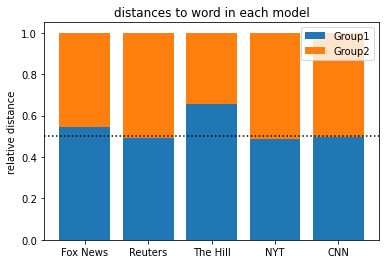

In [106]:
labels = plot_df['news_source']
group1_dist = plot_df['rel_dist_1']
group2_dist = plot_df['rel_dist_2']

fig, ax = plt.subplots()

ax.bar(labels, group1_dist, label="Group1")
ax.bar(labels, group2_dist, label="Group2", bottom = group1_dist)

ax.set_ylabel("relative distance")
ax.set_title("distances to word in each model")
ax.legend()

plt.axhline(y=.5, color='black', linestyle=":")
plt.show()

In [39]:
find_rel_dists_compare_each_model('lgbt', ['homosexual'], 'straight', ['heterosexual'], adjectives)

    news_source    compare_word wordlist1  rel_dist_1 wordlist2  rel_dist_2
260    Fox News        cheerful      lgbt    0.743492  straight    0.256508
145    Fox News         sensual      lgbt    0.741651  straight    0.258349
23     Fox News     resourceful      lgbt    0.740338  straight    0.259662
2      Fox News  impressionable      lgbt    0.738444  straight    0.261556
76     Fox News      submissive      lgbt    0.736034  straight    0.263966
    news_source compare_word wordlist1  rel_dist_1 wordlist2  rel_dist_2
409    Fox News    religious      lgbt    0.450686  straight    0.549314
125    Fox News      hateful      lgbt    0.482657  straight    0.517343
365    Fox News      liberal      lgbt    0.484289  straight    0.515711
351    Fox News     ignorant      lgbt    0.488018  straight    0.511982
301    Fox News        cruel      lgbt    0.488390  straight    0.511610


    news_source  compare_word wordlist1  rel_dist_1 wordlist2  rel_dist_2
217     Reuters      maternal 

In [164]:
find_avg_dists_compare_each_model("r", r_list, "d", d_list, adjectives)


if difference between dists is positive, association is stronger 
with wordlist1. if negative, association is stronger with wordlist2

    news_source wordlist1 wordlist2   compare_word      diff
365    Fox News         r         d        liberal  0.333428
334    Fox News         r         d    progressive  0.260493
109    Fox News         r         d  irresponsible  0.221325
122    Fox News         r         d      dishonest  0.203352
385    Fox News         r         d        extreme  0.199620
    news_source wordlist1 wordlist2  compare_word      diff
386    Fox News         r         d        narrow -0.321350
206    Fox News         r         d   questioning -0.307791
176    Fox News         r         d         blunt -0.295692
342    Fox News         r         d       driving -0.264825
318    Fox News         r         d  conservative -0.249077

if difference between dists is positive, association is stronger 
with wordlist1. if negative, association is stronger with wordlist2

  

In [158]:
print_word_dists_each_model(['ocasio'], adjectives)

(423, 4)
       source    word           adj      dist
334  Fox News  ocasio   progressive  0.370098
40   Fox News  ocasio    boisterous  0.443925
264  Fox News  ocasio  enthusiastic  0.447008
16   Fox News  ocasio     sarcastic  0.463494
365  Fox News  ocasio       liberal  0.469194
(423, 4)
      source    word          adj      dist
64   Reuters  ocasio     scornful  0.405611
1    Reuters  ocasio      devious  0.417613
23   Reuters  ocasio  resourceful  0.439989
334  Reuters  ocasio  progressive  0.441955
13   Reuters  ocasio    resentful  0.456405
(423, 4)
       source    word          adj      dist
334  The Hill  ocasio  progressive  0.530572
133  The Hill  ocasio     dogmatic  0.556372
365  The Hill  ocasio      liberal  0.561867
182  The Hill  ocasio   bewildered  0.573931
86   The Hill  ocasio  thoughtless  0.591602
(423, 4)
    source    word           adj      dist
334    NYT  ocasio   progressive  0.328578
365    NYT  ocasio       liberal  0.416380
419    NYT  ocasio     po

In [162]:
print_word_dists_each_model(['shooting'], adjectives)

(423, 4)
       source      word          adj      dist
179  Fox News  shooting  disciplined  0.486670
38   Fox News  shooting  frightening  0.510087
92   Fox News  shooting        stoic  0.525629
304  Fox News  shooting      hurried  0.540596
43   Fox News  shooting    tasteless  0.542874
(423, 4)
      source      word       adj      dist
92   Reuters  shooting     stoic  0.496251
187  Reuters  shooting  athletic  0.525407
64   Reuters  shooting  scornful  0.532825
268  Reuters  shooting    heroic  0.535264
59   Reuters  shooting    crafty  0.552180
(423, 4)
       source      word           adj      dist
115  The Hill  shooting         crisp  0.521371
149  The Hill  shooting  contemptible  0.606837
86   The Hill  shooting   thoughtless  0.609420
182  The Hill  shooting    bewildered  0.609676
304  The Hill  shooting       hurried  0.615771
(423, 4)
    source      word           adj      dist
239    NYT  shooting    disturbing  0.521737
117    NYT  shooting         naive  0.551564
3

In [29]:
print_word_dists_each_model(['metoo'])

(423, 4)
       source   word          adj      dist
131  Fox News  metoo       sordid  0.397127
81   Fox News  metoo     aspiring  0.448535
96   Fox News  metoo    outspoken  0.494659
257  Fox News  metoo  spontaneous  0.505243
75   Fox News  metoo     forceful  0.507450
(423, 4)
      source   word         adj      dist
93   Reuters  metoo  hysterical  0.410461
6    Reuters  metoo  effeminate  0.440745
62   Reuters  metoo  intolerant  0.446195
297  Reuters  metoo   emotional  0.467436
239  Reuters  metoo  disturbing  0.469760
(423, 4)
       source   word          adj      dist
257  The Hill  metoo  spontaneous  0.451610
200  The Hill  metoo  imaginative  0.477864
212  The Hill  metoo     eloquent  0.485439
133  The Hill  metoo     dogmatic  0.486279
93   The Hill  metoo   hysterical  0.489868
(423, 4)
    source   word           adj      dist
93     NYT  metoo    hysterical  0.494415
128    NYT  metoo   reactionary  0.513331
133    NYT  metoo      dogmatic  0.522175
64     NYT  meto

In [31]:
print_word_dists_each_model(['american'])

(423, 4)
       source      word            adj      dist
286  Fox News  american      oppressed  0.430025
143  Fox News  american      repressed  0.470680
203  Fox News  american  conscientious  0.476445
183  Fox News  american      courteous  0.496688
303  Fox News  american      agreeable  0.500179
(423, 4)
      source      word           adj      dist
182  Reuters  american    bewildered  0.555218
64   Reuters  american      scornful  0.565878
0    Reuters  american  disorganized  0.575307
20   Reuters  american      venomous  0.578273
187  Reuters  american      athletic  0.583312
(423, 4)
       source      word             adj      dist
44   The Hill  american       sedentary  0.452374
13   The Hill  american       resentful  0.462171
216  The Hill  american      benevolent  0.483714
399  The Hill  american        ordinary  0.485799
2    The Hill  american  impressionable  0.493461
(423, 4)
    source      word           adj      dist
137    NYT  american  discontented  0.48510